# Project - Video Game Sales

In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('vgsales.csv')

Importing all the needed modules for the analysis of this dataset, while also reading in the data.

# Data Inspection & Cleanup

In [198]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [199]:
count_row = df.shape[0]
count_col = df.shape[1]

print("Number of rows:", count_row)
print("Number of columns:", count_col)

Number of rows: 16598
Number of columns: 11


In [200]:
dup = df.duplicated().sum()
print(f'Thankfully, in this dataset there are {dup} duplicates')

Thankfully, in this dataset there are 0 duplicates


In [201]:
y_null = df['Year'].isnull().sum()
pub_null = df['Publisher'].isnull().sum()
total = y_null + pub_null

print(f'In the entire dataset, there are only {total} NaN\'s, which are in 2 of the 11 columns:\n')
print(f'\'Year\', which has {y_null} NaN\'s; and \'Publisher\', which has {pub_null} NaN\'s.')

In the entire dataset, there are only 329 NaN's, which are in 2 of the 11 columns:

'Year', which has 271 NaN's; and 'Publisher', which has 58 NaN's.


Seeing as how I did not think the Publisher NaN's would affect the process of analysis much, I only filled the NaN's in the 'Year' column with the float value of 0. This way an error will not be raised when taking values that require total numerical data from the 'Year' column.

An example of a filled Year NaN with '0', while still having a Publisher NaN, can be seen below:

In [202]:
df['Year'] = df['Year'].fillna(0)
display(df.iloc[470])

Rank                                   471
Name            wwe Smackdown vs. Raw 2006
Platform                               PS2
Year                                   0.0
Genre                             Fighting
Publisher                              NaN
NA_Sales                              1.57
EU_Sales                              1.02
JP_Sales                               0.0
Other_Sales                           0.41
Global_Sales                           3.0
Name: 470, dtype: object

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Lastly, in observing the datatype of each column, there are 7 numeric columns and 4 categorical columns.

# Basic Info

In [204]:
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


The top 10 games in the dataset are all created by Nintendo, ranging from 82.74 million to 28.31 million in worldwide sales.

In [205]:
df.tail(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16588,16591,Mega Brain Boost,DS,2008.0,Puzzle,Majesco Entertainment,0.01,0.00,0.00,0.0,0.01
16589,16592,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016.0,Action,dramatic create,0.00,0.00,0.01,0.0,0.01
16590,16593,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007.0,Role-Playing,Falcom Corporation,0.00,0.00,0.01,0.0,0.01
16591,16594,Myst IV: Revelation,PC,2004.0,Adventure,Ubisoft,0.01,0.00,0.00,0.0,0.01
16592,16595,Plushees,DS,2008.0,Simulation,Destineer,0.01,0.00,0.00,0.0,0.01
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01


The lowest ranking games are certainly a variety of genres and publishers. The only things that they share in common with each other is their pitiful amount of sales. Notice that the sales for most of them are 0.0 or 0.01. This is because the data set only recognizes games that sold over 100,000 copies. Thus, sad little games like "Mega Brain Boost" only sold about 100,000 copies worldwide, and all of those were in North America.

# Data Analysis

### What is the most common publisher, genre, and platform?

In [206]:
hipub = df['Publisher'].describe().top
higen = df['Genre'].describe().top
hiplat = df['Platform'].describe().top

print(f'{hipub} is the most common publisher\n{higen} is the most common genre\n{hiplat} is the most common platform to play on')

Electronic Arts is the most common publisher
Action is the most common genre
DS is the most common platform to play on


### How many 'Call of Duty' games are there in the dataset?

In [207]:
cod = df[(df.Name.str.contains("Call of Duty"))]
cod_len = len(cod)

print(f'There are {cod_len} Call of Duty games in the dataset')

There are 59 Call of Duty games in the dataset


### What is the average, minimum, and maximum worldwide sales for 'Call of Duty' games?
### For max and min, which game is it?

In [208]:
df[(df.Name.str.contains("Call of Duty"))].Global_Sales.agg(['mean'])


mean    4.193898
Name: Global_Sales, dtype: float64

In [209]:
df[(df.Name.str.contains("Call of Duty"))].agg(['min'])

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
min,30,Call of Duty 2,DS,0.0,Action,Activision,0.0,0.0,0.0,0.0,0.02


In [210]:
df[(df.Name.str.contains("Call of Duty"))].agg(['max'])

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
max,15807,Call of Duty: World at War Final Fronts,XOne,2016.0,Shooter,Activision,9.67,5.88,0.65,2.52,14.76


### What is the percentage of the Genre column is made up of the 'Shooter' genre?

In [211]:
shoot = df[(df.Genre=='Shooter')]
shoot_len = len(shoot)
gen = df['Genre']
gen_len = len(gen)
shoot_per = (shoot_len/gen_len) * 100

print(f'Among the {gen_len} values in the genre column, {shoot_len} of them are shooters.')
print(f'Therefore, shooters make up for {shoot_per:.3}% of the genres.')

Among the 16598 values in the genre column, 1310 of them are shooters.
Therefore, shooters make up for 7.89% of the genres.


### What is the total amount of sales from all games in the dataset?

In [212]:
sales = df['Global_Sales'].sum()
print(f'The total amount of sales from all games globally is {sales} million copies (thats about 892 billion copies).')

The total amount of sales from all games globally is 8920.44 million copies (thats about 892 billion copies).


### What is the amount of sales per genre?

Text(0, 0.5, 'Genres')

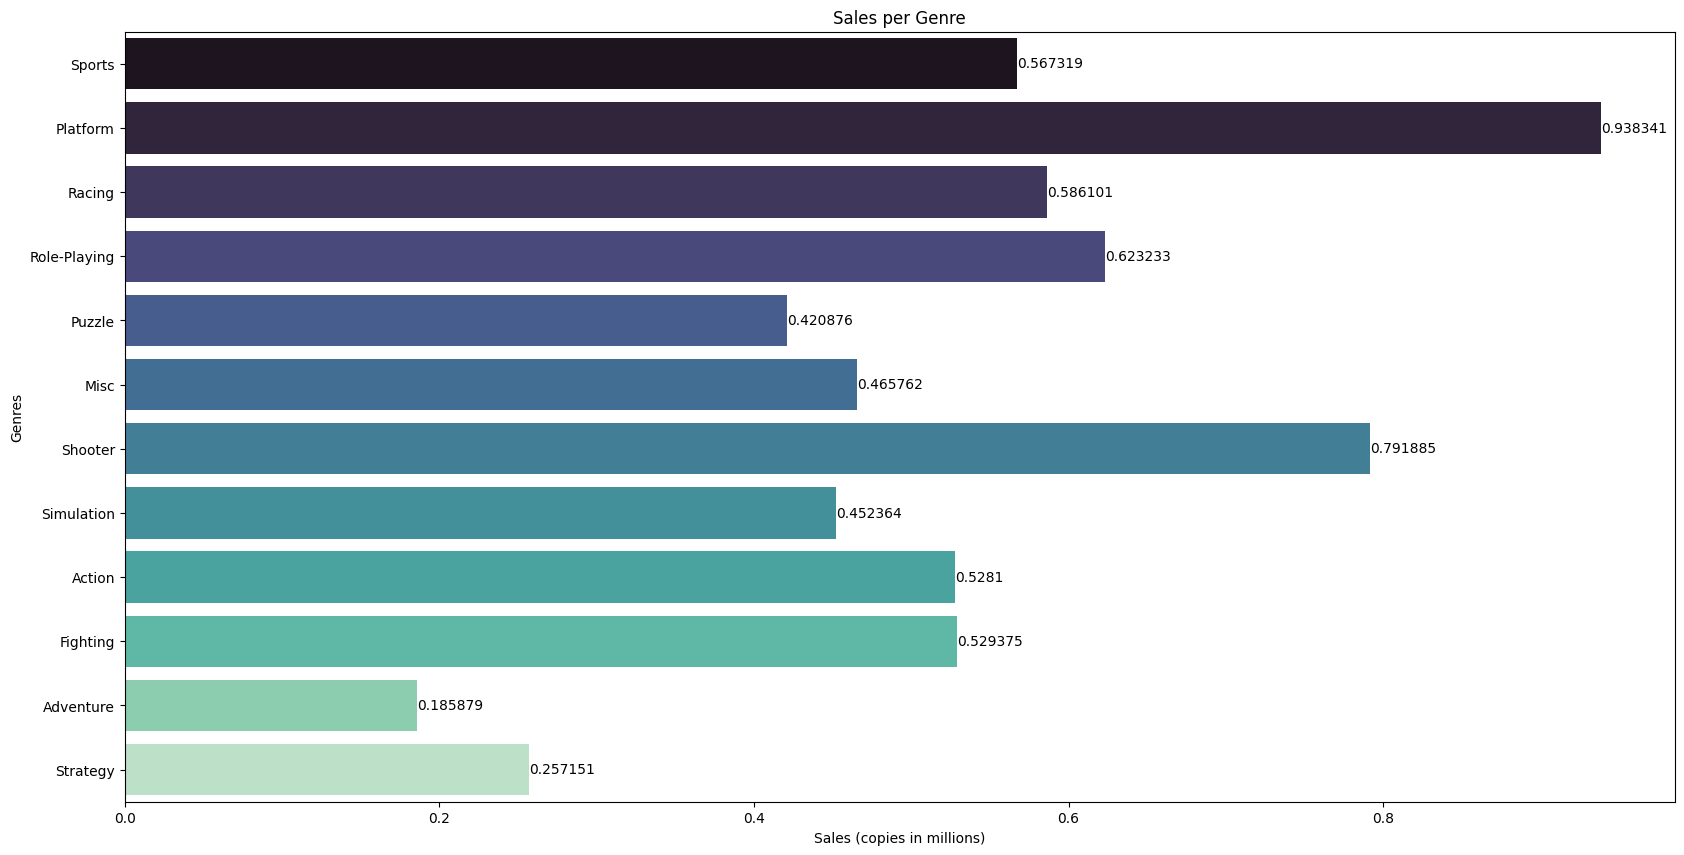

In [213]:
plt.figure(figsize=(20,10))
hbar = sns.barplot(x='Global_Sales', y='Genre', data=df, errorbar=None, palette='mako')
hbar.bar_label(hbar.containers[0])
plt.title('Sales per Genre')
plt.xlabel('Sales (copies in millions)')
plt.ylabel('Genres')

### What is the amount of North American sales per genre?

Text(0, 0.5, 'Sales in North America (copies in millions)')

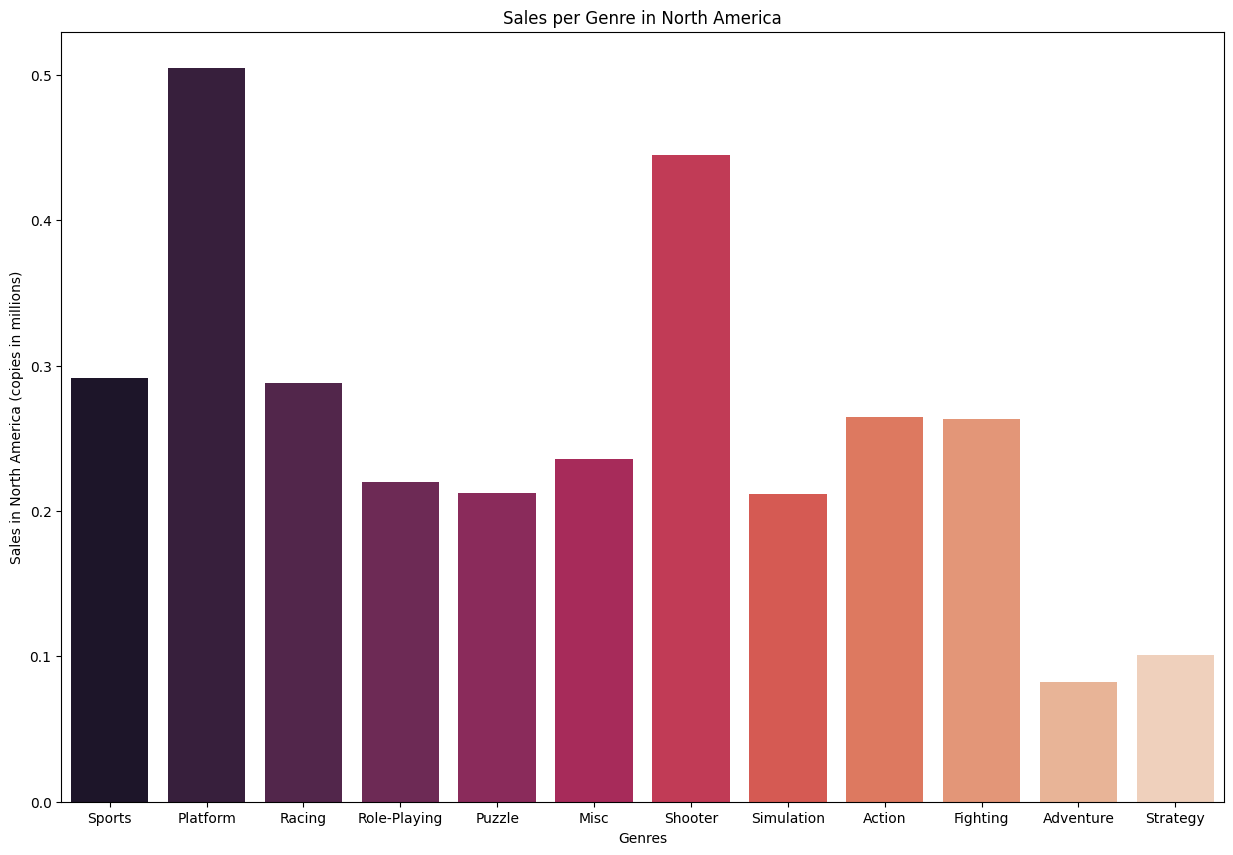

In [214]:
plt.figure(figsize=(15,10))
sns.barplot(data=df, x=df.Genre, y=df.NA_Sales, errorbar=None, palette="rocket")
plt.title('Sales per Genre in North America')
plt.xlabel('Genres')
plt.ylabel('Sales in North America (copies in millions)')

### What is the amount of sales per platform?

Text(0, 0.5, 'Sales (copies in millions)')

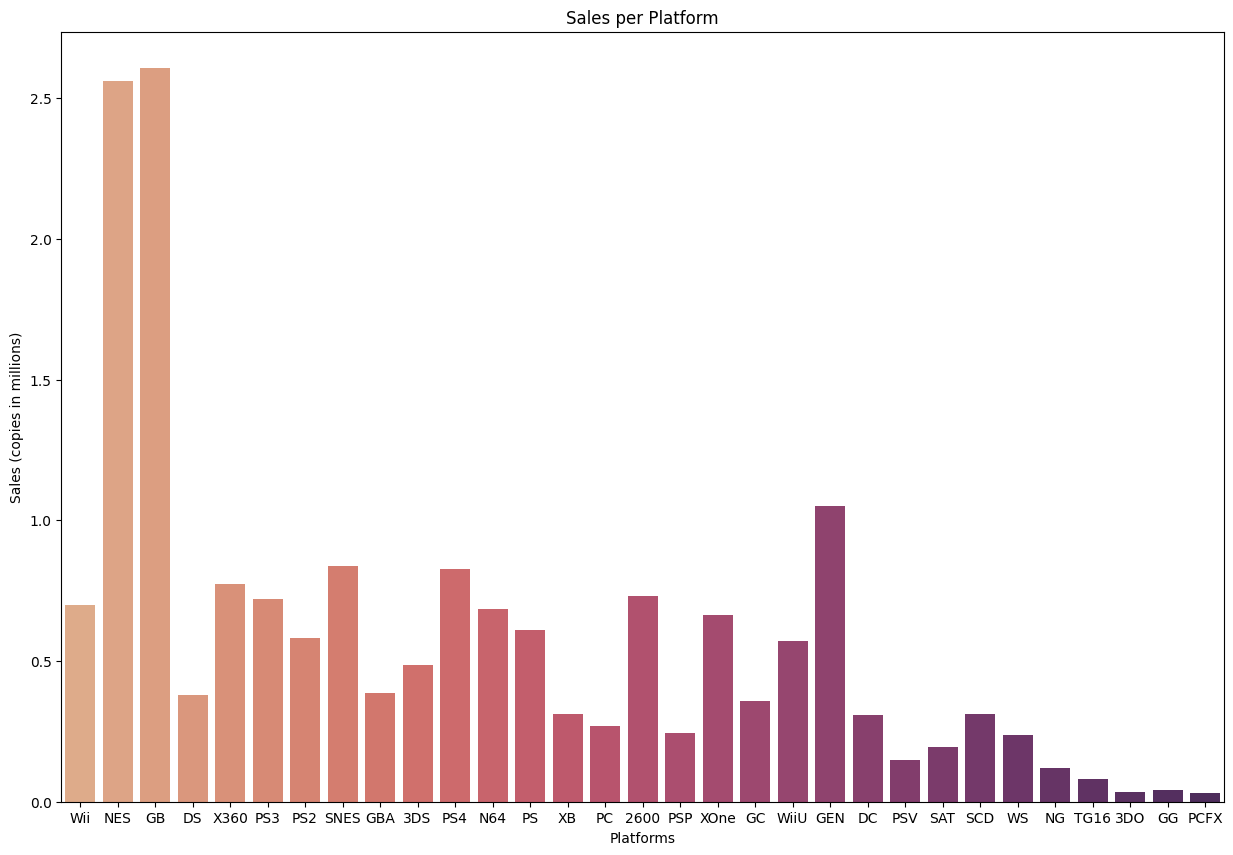

In [215]:
plt.figure(figsize=(15,10))
sns.barplot(data=df, x=df.Platform, y=df.Global_Sales, errorbar=None, palette="flare")
plt.title('Sales per Platform')
plt.xlabel('Platforms')
plt.ylabel('Sales (copies in millions)')

### What is the amount of sales per platform completed in Japan?

Text(0, 0.5, 'Sales in Japan (copies in millions)')

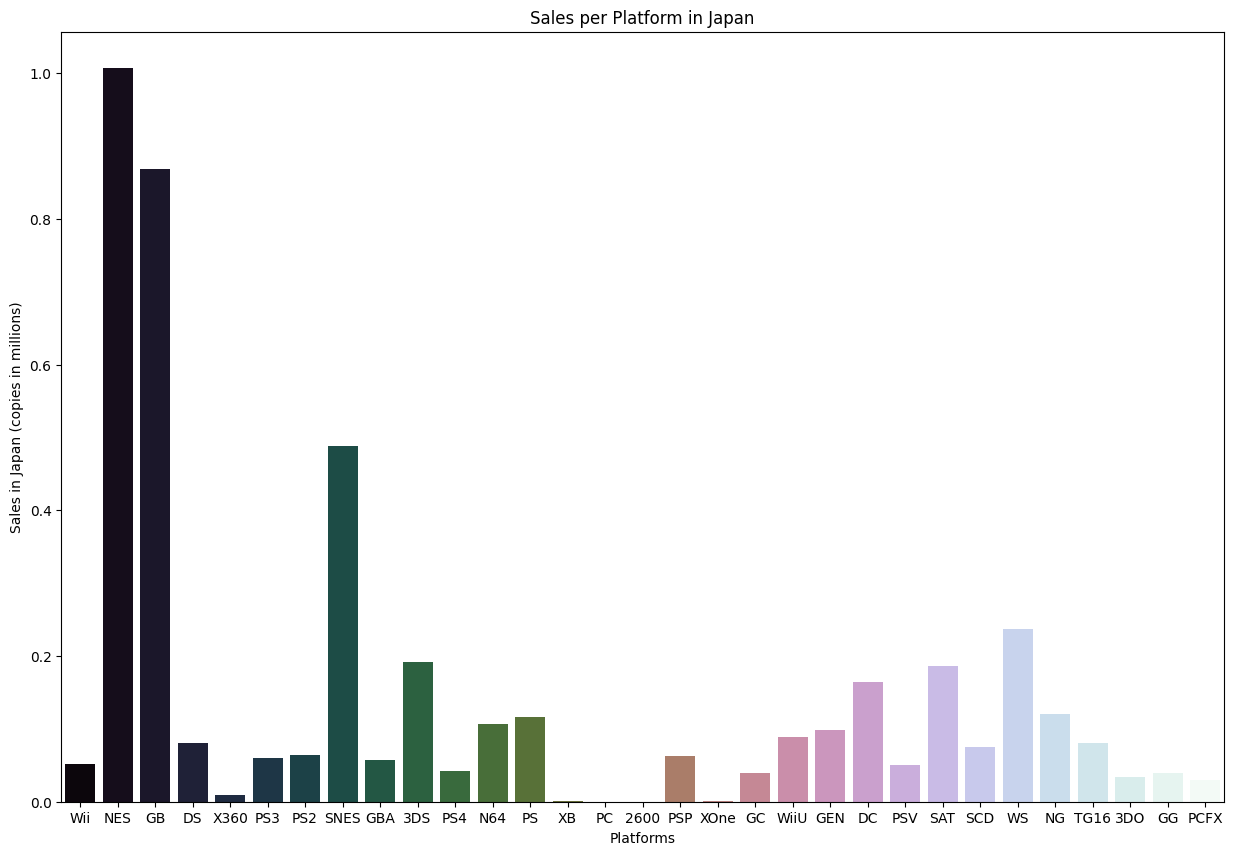

In [216]:
plt.figure(figsize=(15,10))
sns.barplot(data=df, x=df.Platform, y=df.JP_Sales, errorbar=None, palette="cubehelix")
plt.title('Sales per Platform in Japan')
plt.xlabel('Platforms')
plt.ylabel('Sales in Japan (copies in millions)')

### What is the amount of sales per publisher?

Text(0, 0.5, 'Publishers')

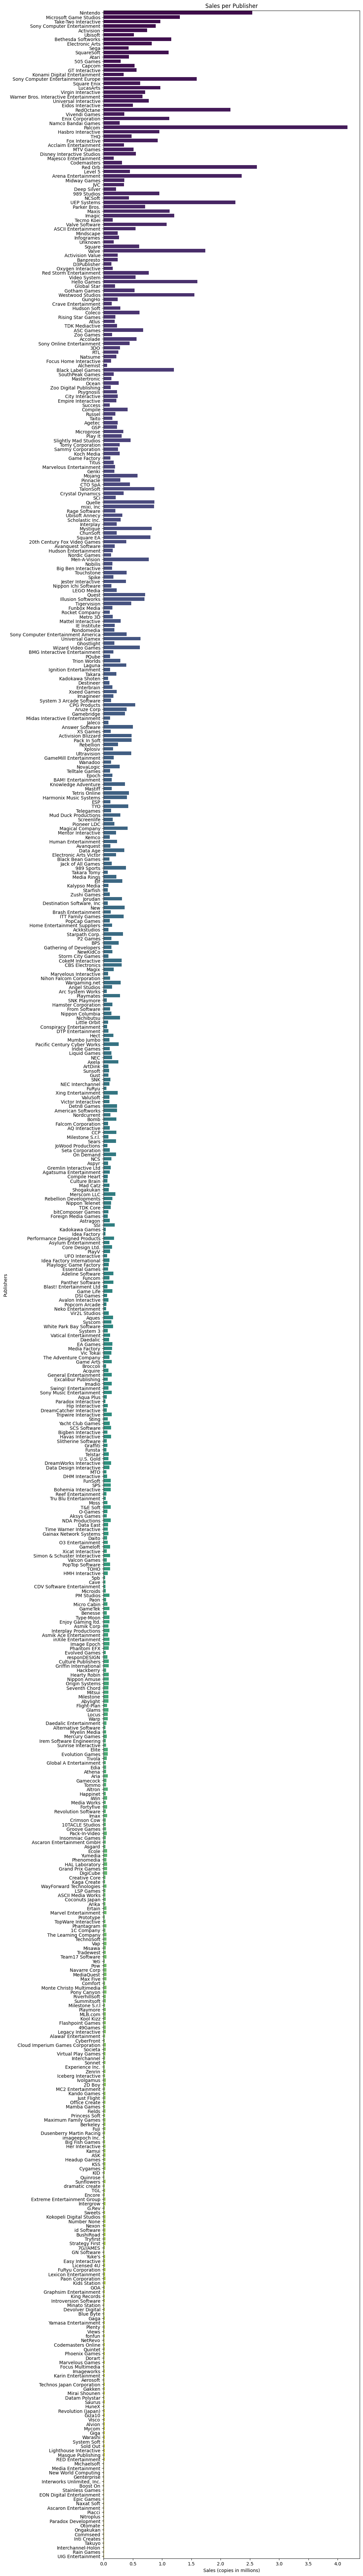

In [217]:
plt.figure(figsize=(10,100))
sns.barplot(data=df, x=df.Global_Sales, y=df.Publisher, errorbar=None, palette="viridis")
plt.title('Sales per Publisher')
plt.xlabel('Sales (copies in millions)')
plt.ylabel('Publishers')